<h4>A Neural Network with one Hidden Layer for Classification</h4>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_10951/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def layer_sizes(X, Y):
  
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_y)

In [3]:
def sigmoid(Z):
    
    A = 1 / ( 1 + np.exp(-Z))
    return A

In [4]:
def param_init(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return params

In [5]:
def forward_propagation(X, params):
  
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [6]:
def compute_cost(A2, Y):
   
    m = Y.shape[1] 

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension you expect. 
                                   
    return cost

In [7]:
def backward_propagation(params, cache, X, Y):
   
    m = X.shape[1]
    
    W1 = params["W1"]
    W2 = params["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [8]:
def update_params(params, grads, learning_rate):
   
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
 
    W1 -= learning_rate * dW1 
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
    
    return params

In [9]:
def nn_model(X, Y, n_h, epochs=10000, learning_rate=0.01, print_cost=False, num=100, seed=3):

    np.random.seed(seed)
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    params = param_init(n_x, n_h, n_y)
    costs = []

    for i in range(0, epochs):
         
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(params, cache, X, Y)
        params = update_params(params, grads, learning_rate)
        costs.append(cost)
        if print_cost and i % num == 0:
            print (f"Epoch {i}, Cost: {cost}")

    return params, costs

In [10]:
def predict(params, X):

    A2, cache = forward_propagation(X, params)
    predictions = np.where(A2 > 0.5, 1, 0) 
    
    return predictions

<h4>Data Generation</h4>

In [11]:
np.random.seed(1)
m = 4000 
N = int(m/2) 
D = 2 
X = np.zeros((m,D))
Y = np.zeros((m,1), dtype='uint8') 
a = 4 

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
    r = a*np.sin(4*t) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
        
X = X.T
Y = Y.T
print(X.shape)
print(Y.shape)


(2, 4000)
(1, 4000)


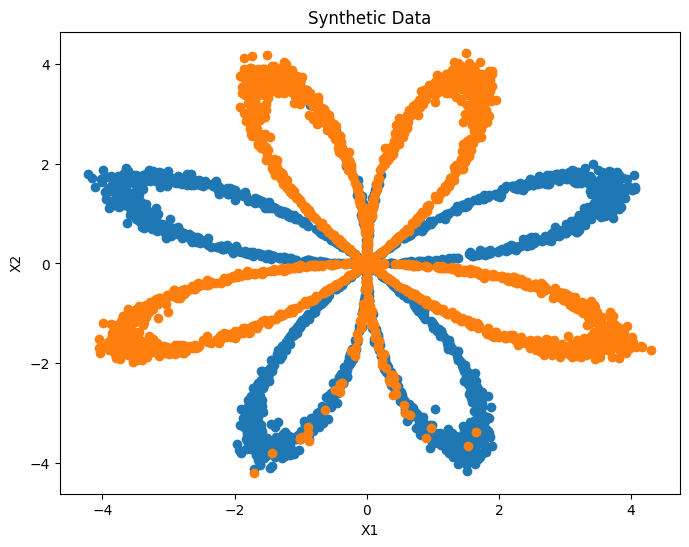

In [12]:
X_1_1 = []
X_1_2 = []
X_0_1 = []
X_0_2 = []

for i in range(X.shape[1]):
    if Y[0, i] == 1:
        X_1_1.append(X[0, i])
        X_1_2.append(X[1, i])
    else:
        X_0_1.append(X[0, i])
        X_0_2.append(X[1, i])
 
plt.figure(figsize=(8, 6))
plt.scatter(X_1_1, X_1_2)
plt.scatter(X_0_1, X_0_2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data")
plt.show()
    

In [13]:
params, costs = nn_model(
    X=X,
    Y=Y, 
    n_h=6, 
    epochs=10000,
    learning_rate=1.2, 
    print_cost=True, 
    num=500, 
    seed=3
)

Epoch 0, Cost: 0.6930478525463555
Epoch 500, Cost: 0.22209886599763262
Epoch 1000, Cost: 0.21086154600661763
Epoch 1500, Cost: 0.20584402874460392
Epoch 2000, Cost: 0.20268765047656162
Epoch 2500, Cost: 0.20039214167021885
Epoch 3000, Cost: 0.19857645336561483
Epoch 3500, Cost: 0.1970514666621287
Epoch 4000, Cost: 0.195706797738939
Epoch 4500, Cost: 0.19447386618800425
Epoch 5000, Cost: 0.19332048201673027
Epoch 5500, Cost: 0.19224268617019777
Epoch 6000, Cost: 0.1912392863315417
Epoch 6500, Cost: 0.19029746759113395
Epoch 7000, Cost: 0.18940698365949982
Epoch 7500, Cost: 0.18857992025776354
Epoch 8000, Cost: 0.1878327534893419
Epoch 8500, Cost: 0.1871668598412982
Epoch 9000, Cost: 0.18657293376162698
Epoch 9500, Cost: 0.1860403133838554


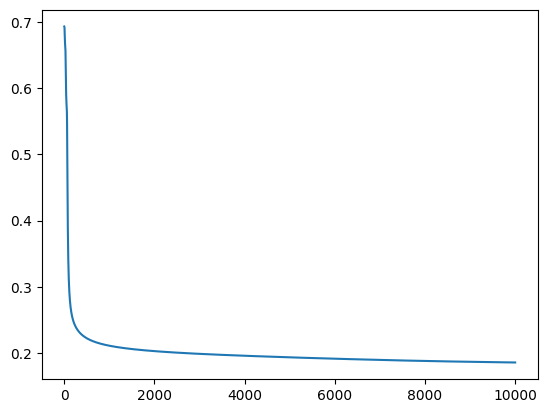

In [14]:
plt.plot(costs)
plt.show()

In [15]:
print(params)

{'W1': array([[ -8.70088694,  -9.85188588],
       [  8.10181116,  -9.17322118],
       [ -3.14408387,  -7.29403363],
       [  0.40201162,   3.58276412],
       [  0.01432379, -11.18610503],
       [ -1.47664015,   5.35616765]]), 'b1': array([[ 0.01234478],
       [-0.04124499],
       [ 0.06919872],
       [-0.06359814],
       [ 0.00595461],
       [-0.18955388]]), 'W2': array([[ 5.13911563,  5.15871913,  1.94587477,  2.7787414 , -9.0647308 ,
        -2.04815259]]), 'b2': array([[-0.0533058]])}


In [16]:
predicted = predict(params, X)

In [17]:
print(predicted[:20])
print(predicted.shape)

[[0 1 1 ... 1 1 0]]
(1, 4000)


In [18]:
accuracy = (np.sum([1 if predicted[0, i]==Y[0, i] else 0 for i in range(4000)]) / 4000) * 100

In [19]:
print(accuracy)

93.8


In [20]:
np.random.seed(6)
m = 5000 
N = int(m/2) 
D = 2
X = np.zeros((m,D))
Y = np.zeros((m,1), dtype='uint8') 
a = 4 

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
    r = a*np.sin(4*t) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j
        
X = X.T
Y = Y.T
print(X.shape)
print(Y.shape)


(2, 5000)
(1, 5000)


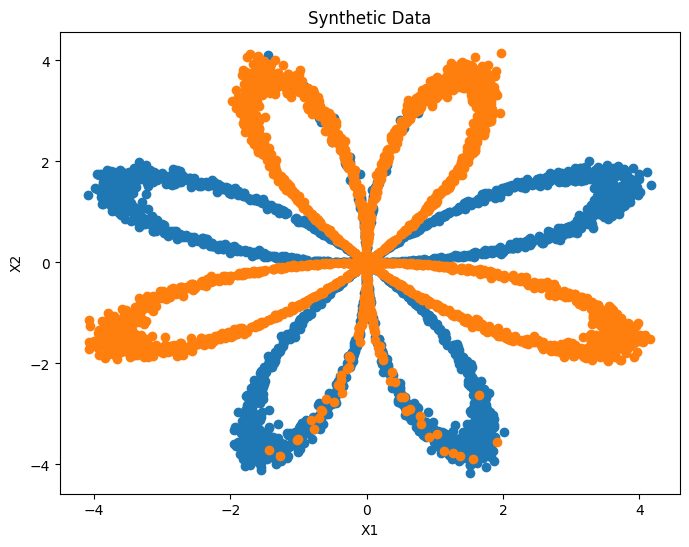

In [21]:
X_1_1 = []
X_1_2 = []
X_0_1 = []
X_0_2 = []

for i in range(X.shape[1]):
    if Y[0, i] == 1:
        X_1_1.append(X[0, i])
        X_1_2.append(X[1, i])
    else:
        X_0_1.append(X[0, i])
        X_0_2.append(X[1, i])
 
plt.figure(figsize=(8, 6))
plt.scatter(X_1_1, X_1_2)
plt.scatter(X_0_1, X_0_2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data")
plt.show()

In [22]:
X_train = X[:, :4000]
Y_train = Y[:, :4000]
X_test = X[:, 4000:]
Y_test = Y[:, 4000:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2, 4000)
(1, 4000)
(2, 1000)
(1, 1000)


In [23]:
params, costs = nn_model(
    X=X_train,
    Y=Y_train, 
    n_h=5, 
    epochs=10000,
    learning_rate=0.2, 
    print_cost=True, 
    num=500, 
    seed=3
)

Epoch 0, Cost: 0.6930806186483818
Epoch 500, Cost: 0.32975407320873307
Epoch 1000, Cost: 0.24842823829985902
Epoch 1500, Cost: 0.22973903679687382
Epoch 2000, Cost: 0.22005084439066372
Epoch 2500, Cost: 0.2136314663477134
Epoch 3000, Cost: 0.20888762735671565
Epoch 3500, Cost: 0.20517250416680732
Epoch 4000, Cost: 0.2021534300684089
Epoch 4500, Cost: 0.19963393892705847
Epoch 5000, Cost: 0.19748762918654164
Epoch 5500, Cost: 0.19562840171610232
Epoch 6000, Cost: 0.1939952139360875
Epoch 6500, Cost: 0.19254349833398982
Epoch 7000, Cost: 0.19123998364437206
Epoch 7500, Cost: 0.1900594038178702
Epoch 8000, Cost: 0.1889823203722735
Epoch 8500, Cost: 0.18799362839705075
Epoch 9000, Cost: 0.18708149199341428
Epoch 9500, Cost: 0.18623655400343703


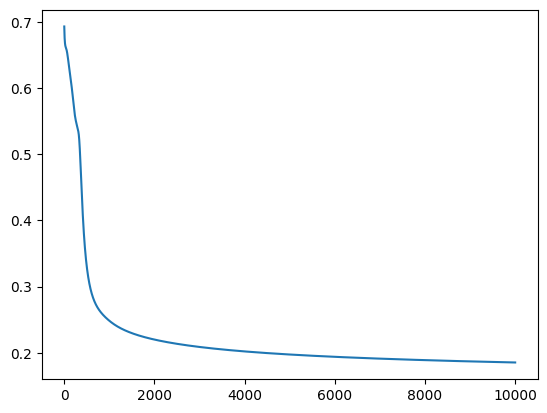

In [24]:
plt.plot(costs)
plt.show()

In [27]:
def accuracy(params, X_train, Y_train, X_test, Y_test):
    train_p = predict(params, X_train)
    test_p = predict(params, X_test)
    train_accuracy = (np.sum([1 if train_p[0, i]==Y_train[0, i] else 0 for i in range(4000)]) / 4000) * 100
    test_accuracy = (np.sum([1 if test_p[0, i]==Y_test[0, i] else 0 for i in range(1000)]) / 1000) * 100
    print("______________________________________________")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("______________________________________________")

______ Number of Units in the Hidden Layer : 2 _____
___________________________________________________________________
Epoch 0, Cost: 0.6931611706871722
Epoch 500, Cost: 0.5220413312563769
Epoch 1000, Cost: 0.5077213230961793
Epoch 1500, Cost: 0.5014208563225957
Epoch 2000, Cost: 0.49850576684364045
Epoch 2500, Cost: 0.49677730366808026
Epoch 3000, Cost: 0.4955865483564647
Epoch 3500, Cost: 0.49467995473944076
Epoch 4000, Cost: 0.493940897871503
Epoch 4500, Cost: 0.49330979789427054
Epoch 5000, Cost: 0.49275387684313854
Epoch 5500, Cost: 0.49225397488254974
Epoch 6000, Cost: 0.4917982115182851
Epoch 6500, Cost: 0.49137873757684397
Epoch 7000, Cost: 0.49099001111954266
Epoch 7500, Cost: 0.4906278683301561
Epoch 8000, Cost: 0.49028901923474233
Epoch 8500, Cost: 0.4899707699017928
Epoch 9000, Cost: 0.48967086335713234
Epoch 9500, Cost: 0.4893873818331793
______________________________________________
Train Accuracy: 72.55
Test Accuracy: 5.2
______________________________________________

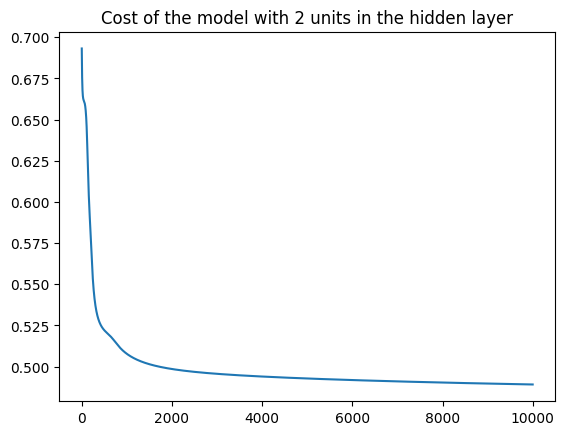

______ Number of Units in the Hidden Layer : 4 _____
___________________________________________________________________
Epoch 0, Cost: 0.6931633018603168
Epoch 500, Cost: 0.35150843057989306
Epoch 1000, Cost: 0.2537793969397123
Epoch 1500, Cost: 0.23938960328773665
Epoch 2000, Cost: 0.23234128898011888
Epoch 2500, Cost: 0.22768033522661402
Epoch 3000, Cost: 0.22415639885097458
Epoch 3500, Cost: 0.22131546658984835
Epoch 4000, Cost: 0.21894592912099942
Epoch 4500, Cost: 0.21692428485565868
Epoch 5000, Cost: 0.21517048638197292
Epoch 5500, Cost: 0.21362922769493567
Epoch 6000, Cost: 0.21226045580383196
Epoch 6500, Cost: 0.21103412076946487
Epoch 7000, Cost: 0.20992707064243904
Epoch 7500, Cost: 0.20892110405830203
Epoch 8000, Cost: 0.20800168520976356
Epoch 8500, Cost: 0.20715705895147354
Epoch 9000, Cost: 0.206377619813331
Epoch 9500, Cost: 0.2056554493241116
______________________________________________
Train Accuracy: 92.625
Test Accuracy: 81.10000000000001
_________________________

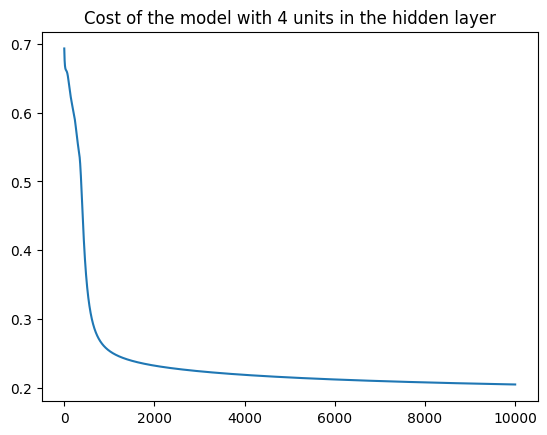

______ Number of Units in the Hidden Layer : 5 _____
___________________________________________________________________
Epoch 0, Cost: 0.6930806186483818
Epoch 500, Cost: 0.32975407320873307
Epoch 1000, Cost: 0.24842823829985902
Epoch 1500, Cost: 0.22973903679687382
Epoch 2000, Cost: 0.22005084439066372
Epoch 2500, Cost: 0.2136314663477134
Epoch 3000, Cost: 0.20888762735671565
Epoch 3500, Cost: 0.20517250416680732
Epoch 4000, Cost: 0.2021534300684089
Epoch 4500, Cost: 0.19963393892705847
Epoch 5000, Cost: 0.19748762918654164
Epoch 5500, Cost: 0.19562840171610232
Epoch 6000, Cost: 0.1939952139360875
Epoch 6500, Cost: 0.19254349833398982
Epoch 7000, Cost: 0.19123998364437206
Epoch 7500, Cost: 0.1900594038178702
Epoch 8000, Cost: 0.1889823203722735
Epoch 8500, Cost: 0.18799362839705075
Epoch 9000, Cost: 0.18708149199341428
Epoch 9500, Cost: 0.18623655400343703
______________________________________________
Train Accuracy: 92.525
Test Accuracy: 52.900000000000006
_________________________

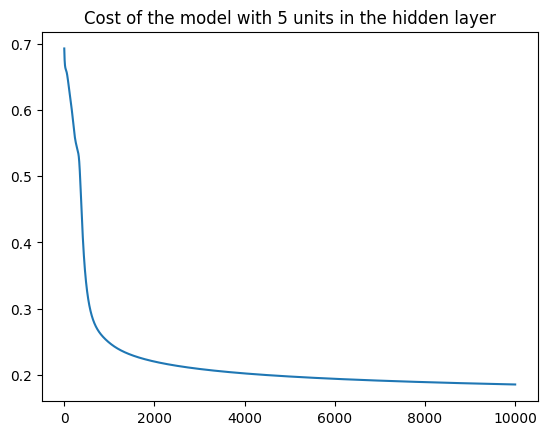

______ Number of Units in the Hidden Layer : 7 _____
___________________________________________________________________
Epoch 0, Cost: 0.6931110904931402
Epoch 500, Cost: 0.3181857361654269
Epoch 1000, Cost: 0.23723132869414273
Epoch 1500, Cost: 0.21111399806088435
Epoch 2000, Cost: 0.19696088768478115
Epoch 2500, Cost: 0.18828908306848102
Epoch 3000, Cost: 0.1823549299841955
Epoch 3500, Cost: 0.1779979899986814
Epoch 4000, Cost: 0.1746336699665801
Epoch 4500, Cost: 0.17193211171842557
Epoch 5000, Cost: 0.16969275277255913
Epoch 5500, Cost: 0.1677880411349313
Epoch 6000, Cost: 0.166134820700202
Epoch 6500, Cost: 0.16467763004307745
Epoch 7000, Cost: 0.1633781544811834
Epoch 7500, Cost: 0.16220874410072383
Epoch 8000, Cost: 0.16114862000451552
Epoch 8500, Cost: 0.16018164910459645
Epoch 9000, Cost: 0.1592949869607886
Epoch 9500, Cost: 0.15847821143360966
______________________________________________
Train Accuracy: 94.19999999999999
Test Accuracy: 32.0
________________________________

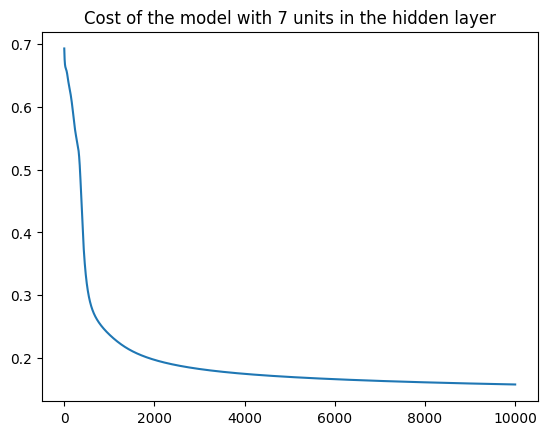

______ Number of Units in the Hidden Layer : 10 _____
___________________________________________________________________
Epoch 0, Cost: 0.693185956475723
Epoch 500, Cost: 0.3326599274777005
Epoch 1000, Cost: 0.24093479591611386
Epoch 1500, Cost: 0.21574416454207235
Epoch 2000, Cost: 0.1979645380202948
Epoch 2500, Cost: 0.18668888322397348
Epoch 3000, Cost: 0.1787903538360826
Epoch 3500, Cost: 0.17264610552742574
Epoch 4000, Cost: 0.16773350856152636
Epoch 4500, Cost: 0.16370962474489284
Epoch 5000, Cost: 0.1602297967047409
Epoch 5500, Cost: 0.15691716108385884
Epoch 6000, Cost: 0.15366777729967226
Epoch 6500, Cost: 0.15078952034474588
Epoch 7000, Cost: 0.14829048231002656
Epoch 7500, Cost: 0.14605865110725033
Epoch 8000, Cost: 0.14401066339646335
Epoch 8500, Cost: 0.14210940944890862
Epoch 9000, Cost: 0.14037552854892762
Epoch 9500, Cost: 0.13884607297352858
______________________________________________
Train Accuracy: 94.525
Test Accuracy: 30.9
______________________________________

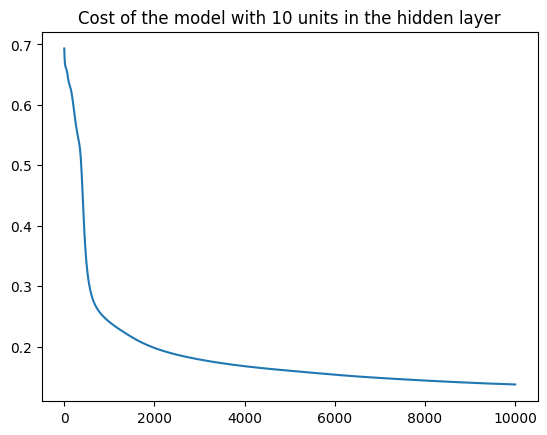

______ Number of Units in the Hidden Layer : 20 _____
___________________________________________________________________
Epoch 0, Cost: 0.6932268825621494
Epoch 500, Cost: 0.3791422492661318
Epoch 1000, Cost: 0.24783205777135545
Epoch 1500, Cost: 0.22708381947939846
Epoch 2000, Cost: 0.2089415683117144
Epoch 2500, Cost: 0.1953602903113304
Epoch 3000, Cost: 0.18642941853830464
Epoch 3500, Cost: 0.17951125791158287
Epoch 4000, Cost: 0.17297751045440812
Epoch 4500, Cost: 0.16667029470461373
Epoch 5000, Cost: 0.16103468322789008
Epoch 5500, Cost: 0.15638034866775366
Epoch 6000, Cost: 0.15265059198799097
Epoch 6500, Cost: 0.14962712285020335
Epoch 7000, Cost: 0.14710782501543287
Epoch 7500, Cost: 0.14493761777024064
Epoch 8000, Cost: 0.14299494956390674
Epoch 8500, Cost: 0.1412150216359795
Epoch 9000, Cost: 0.13958229210412346
Epoch 9500, Cost: 0.13808882812155787
______________________________________________
Train Accuracy: 94.6
Test Accuracy: 30.5
_______________________________________

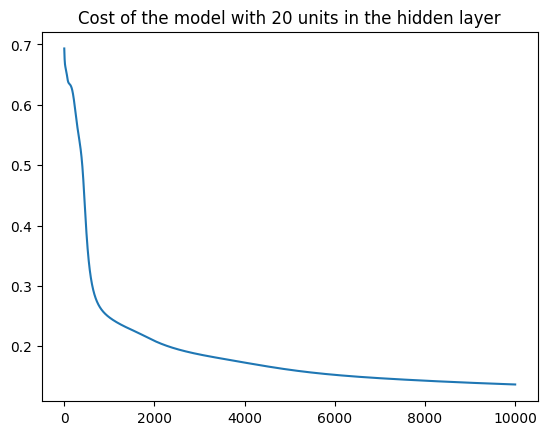

______ Number of Units in the Hidden Layer : 30 _____
___________________________________________________________________
Epoch 0, Cost: 0.6932032198054178
Epoch 500, Cost: 0.43248747459276937
Epoch 1000, Cost: 0.2505401355164243
Epoch 1500, Cost: 0.22968086601028007
Epoch 2000, Cost: 0.21778850842478004
Epoch 2500, Cost: 0.20701905247233757
Epoch 3000, Cost: 0.19548028375274137
Epoch 3500, Cost: 0.18621834118310032
Epoch 4000, Cost: 0.17922255060216988
Epoch 4500, Cost: 0.1734358522085705
Epoch 5000, Cost: 0.1684877777908423
Epoch 5500, Cost: 0.16420681853452906
Epoch 6000, Cost: 0.16043356074072537
Epoch 6500, Cost: 0.15700307520375878
Epoch 7000, Cost: 0.15395183228871548
Epoch 7500, Cost: 0.15128652302292353
Epoch 8000, Cost: 0.14894729847196136
Epoch 8500, Cost: 0.14688131065408833
Epoch 9000, Cost: 0.1450351674342669
Epoch 9500, Cost: 0.14334598861551195
______________________________________________
Train Accuracy: 94.6
Test Accuracy: 30.0
_______________________________________

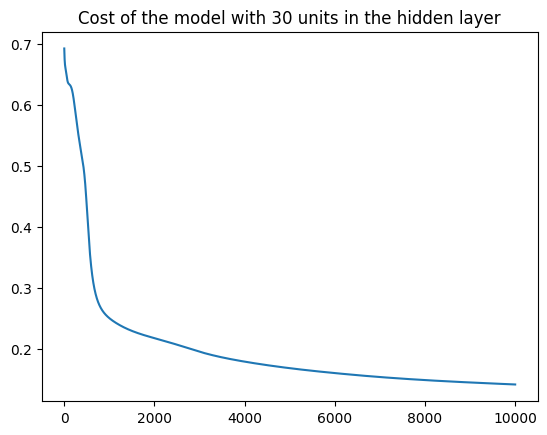

In [30]:
num_units = [2, 4, 5, 7, 10, 20, 30]

for i in range(len(num_units)):
    
    print(f"______ Number of Units in the Hidden Layer : {num_units[i]} _____")
    print("___________________________________________________________________")
    
    params, costs = nn_model(
    X=X_train,
    Y=Y_train, 
    n_h=num_units[i], 
    epochs=10000,
    learning_rate=0.2, 
    print_cost=True, 
    num=500, 
    seed=3
    )
    accuracy(params, X_train, Y_train, X_test, Y_test)
    plt.plot(costs)
    plt.title(f"Cost of the model with {num_units[i]} units in the hidden layer")
    plt.show() 

______ Learning Rate : 0.01 _____
Epoch 0, Cost: 0.6931633018603168
Epoch 500, Cost: 0.6641106096719341
Epoch 1000, Cost: 0.6603439788569091
Epoch 1500, Cost: 0.6543389560184361
Epoch 2000, Cost: 0.6427248068207946
Epoch 2500, Cost: 0.6302621240259271
Epoch 3000, Cost: 0.6196707299740452
Epoch 3500, Cost: 0.6105421339013574
Epoch 4000, Cost: 0.6022600756997105
Epoch 4500, Cost: 0.5931521938275203
Epoch 5000, Cost: 0.5807343440453351
Epoch 5500, Cost: 0.5662893962592641
Epoch 6000, Cost: 0.5537055706849956
Epoch 6500, Cost: 0.5426730031045983
Epoch 7000, Cost: 0.5252066130871456
Epoch 7500, Cost: 0.49410579362715423
Epoch 8000, Cost: 0.4570088981984512
Epoch 8500, Cost: 0.4218300305045898
Epoch 9000, Cost: 0.39224670954376495
Epoch 9500, Cost: 0.368345488831407
______________________________________________
Train Accuracy: 89.45
Test Accuracy: 46.5
______________________________________________
______ Learning Rate : 0.1 _____
Epoch 0, Cost: 0.6931633018603168
Epoch 500, Cost: 0.5814116

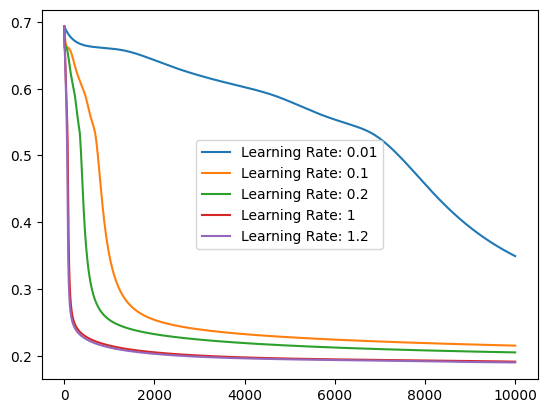

In [35]:
learning_rates = [0.01, 0.1, 0.2, 1, 1.2]
cost_ = []
for i in range(len(learning_rates)):
    
    print(f"______ Learning Rate : {learning_rates[i]} _____")

    params, costs = nn_model(
    X=X_train,
    Y=Y_train, 
    n_h= 4, 
    epochs=10000,
    learning_rate=learning_rates[i], 
    print_cost=True, 
    num=500, 
    seed=3
    )
    accuracy(params, X_train, Y_train, X_test, Y_test)
    cost_.append(costs)

for j in range(len(cost_)):
    plt.plot(cost_[j], label=f"Learning Rate: {learning_rates[j]}")
plt.legend()
plt.show()

In [36]:
params, costs = nn_model(
    X=X_train,
    Y=Y_train, 
    n_h=5, 
    epochs=10000,
    learning_rate=1.2, 
    print_cost=True, 
    num=500, 
    seed=3
)
accuracy(params, X_train, Y_train, X_test, Y_test)


Epoch 0, Cost: 0.6930806186483818
Epoch 500, Cost: 0.20899886579912325
Epoch 1000, Cost: 0.19400179564820513
Epoch 1500, Cost: 0.1870545218711175
Epoch 2000, Cost: 0.18276543144797386
Epoch 2500, Cost: 0.17986423390975972
Epoch 3000, Cost: 0.17780953246289713
Epoch 3500, Cost: 0.1762973707128159
Epoch 4000, Cost: 0.17513571555921845
Epoch 4500, Cost: 0.1741985919912892
Epoch 5000, Cost: 0.17339606455317086
Epoch 5500, Cost: 0.17264704376869675
Epoch 6000, Cost: 0.17179633890578658
Epoch 6500, Cost: 0.16807193566954515
Epoch 7000, Cost: 0.15411909750657923
Epoch 7500, Cost: 0.15157716271211058
Epoch 8000, Cost: 0.14853857445991445
Epoch 8500, Cost: 0.14615174307777204
Epoch 9000, Cost: 0.14484866815366876
Epoch 9500, Cost: 0.14386174735569862
______________________________________________
Train Accuracy: 94.39999999999999
Test Accuracy: 32.7
______________________________________________


<h4>Optimized Hyperparameters (learning_rate = 1.2, number of units in the hidden layer = 4)</h4>

In [37]:
params, costs = nn_model(
    X=X_train,
    Y=Y_train, 
    n_h=4, 
    epochs=10000,
    learning_rate=1.2, 
    print_cost=True, 
    num=500, 
    seed=3
)
accuracy(params, X_train, Y_train, X_test, Y_test)

Epoch 0, Cost: 0.6931633018603168
Epoch 500, Cost: 0.22426976754805253
Epoch 1000, Cost: 0.2123739435682672
Epoch 1500, Cost: 0.2065100483835885
Epoch 2000, Cost: 0.20284147579604042
Epoch 2500, Cost: 0.20029115437939513
Epoch 3000, Cost: 0.19844578675449798
Epoch 3500, Cost: 0.19708279773476534
Epoch 4000, Cost: 0.19604608884800478
Epoch 4500, Cost: 0.19523049020664518
Epoch 5000, Cost: 0.19456878554293153
Epoch 5500, Cost: 0.19401743944662206
Epoch 6000, Cost: 0.19354695114420598
Epoch 6500, Cost: 0.19313576876263427
Epoch 7000, Cost: 0.19276526163932006
Epoch 7500, Cost: 0.19240998660898037
Epoch 8000, Cost: 0.1919944404384527
Epoch 8500, Cost: 0.1912908647114843
Epoch 9000, Cost: 0.19064304406933713
Epoch 9500, Cost: 0.19025307083039783
______________________________________________
Train Accuracy: 93.27499999999999
Test Accuracy: 84.0
______________________________________________
